# 2. Разведочный анализ данных

В рамках предисловия:

Поскольку я подумал, что удаление выбросов так же входит в задание по м.1 по теме сжатия данных, то всё было проделано там. Сюда перенесу то, что оказалось рабочим. Более того, кое-что по сжатию я хочу дополнить, т.к. оказалось, что памяти на ЭВМ маловато, поэтому загрузка датасетов из м.1 дублируется

In [356]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [357]:
# грузим оригинальный train.csv
try:
    train_orig = pd.read_csv('train.csv')
except FileNotFoundError:
    print('Файл train.csv отсутствует')
except Exception as e:
    print(f'Возникла ошибка {e.args[1]}')

In [358]:
# грузим оригинальный objects.csv (который building_meta в задании)
try:
    building_meta_orig = pd.read_csv('objects.csv')
except FileNotFoundError:
    print('Файл objects.csv отсутствует')
except Exception as e:
    print(f'Возникла ошибка {e.args[1]}')

In [359]:
# грузим оригинальный weather_train/test.csv
try:
    weather_train_orig = pd.read_csv('wtrain.csv')
except FileNotFoundError:
    print('Файл wtrain.csv отсутствует')
except Exception as e:
    print(f'Возникла ошибка {e.args[1]}')

In [360]:
# грузим оригинальный weather_train/test.csv
try:
    weather_test_orig = pd.read_csv('wtest.csv')
except FileNotFoundError:
    print('Файл wtest.csv отсутствует')
except Exception as e:
    print(f'Возникла ошибка {e.args[1]}')

In [361]:
# грузим test.csv
try:
    test_orig = pd.read_csv('test.csv')
except FileNotFoundError:
    print('Файл test.csv отсутствует')
except Exception as e:
    print(f'Возникла ошибка {e.args[1]}')

**Работаем с train**

In [362]:
# сводная информация по train
train_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   obj_id      int64  
 2   counter     int64  
 3   datetime    object 
 4   value       float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.0 GB


In [363]:
train_orig.isna().any()

Unnamed: 0    False
obj_id        False
counter       False
datetime      False
value         False
dtype: bool

Что-то не так с датой (не распарсена), потенциально лишний признак, избыточные размеры. Сейчас датасет занимает 2GB в ОЗУ. Пропущенных значений не наблюдается

In [364]:
# функция подготовки train/test
def prepare_train_test(dataset):
    # исправляем тип datetime
    dataset.datetime = pd.to_datetime(dataset.datetime)
    # удалим столбец **Unnamed: 0**
    if 'Unnamed: 0' in dataset.columns:
        dataset = dataset.drop('Unnamed: 0', axis=1)
    # удалим столбец **Unnamed: 0.1**, если он есть
    if 'Unnamed: 0.1' in dataset.columns:
        dataset = dataset.drop('Unnamed: 0.1', axis=1)
    # Сжимаем obj_id и counter
    dataset.obj_id = dataset.obj_id.astype(np.ushort)
    dataset.counter = dataset.counter.astype(np.uint8)
    # жертвуем точностью во имя памяти
    if 'value' in dataset.columns:
        dataset.value = dataset.value.astype(np.float32)
    
    return dataset

In [365]:
# сводная информация по train
train_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   obj_id      int64  
 2   counter     int64  
 3   datetime    object 
 4   value       float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.0 GB


In [366]:
# обработаем функцией подготовки
train_orig = prepare_train_test(train_orig)

In [367]:
train_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column    Dtype         
---  ------    -----         
 0   obj_id    uint16        
 1   counter   uint8         
 2   datetime  datetime64[ns]
 3   value     float32       
dtypes: datetime64[ns](1), float32(1), uint16(1), uint8(1)
memory usage: 289.2 MB


**Вывод по train**

Удалось привести типы признаков к верным и минимальным по размерам, удалён лишний признак. Удалось сжать датасет до 289.2 MB

In [368]:
# процент оптимизации
print('train сжат на {}%'.format(round((1 - 289.2/2048) * 100), 2))

train сжат на 86%


**Работаем с test**

In [369]:
# сводная информация по test
test_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Unnamed: 0    int64 
 1   Unnamed: 0.1  int64 
 2   obj_id        int64 
 3   counter       int64 
 4   datetime      object
dtypes: int64(4), object(1)
memory usage: 4.2 GB


In [370]:
test_orig.isna().any()

Unnamed: 0      False
Unnamed: 0.1    False
obj_id          False
counter         False
datetime        False
dtype: bool

Не распарсена дата/время, лишние признаки Unnamed, избыточные размеры. Сейчас датасет занимает 4.2GB в ОЗУ. Пропущенных значений не наблюдается

In [371]:
# обработаем функцией подготовки
test_orig = prepare_train_test(test_orig)

In [372]:
test_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 3 columns):
 #   Column    Dtype         
---  ------    -----         
 0   obj_id    uint16        
 1   counter   uint8         
 2   datetime  datetime64[ns]
dtypes: datetime64[ns](1), uint16(1), uint8(1)
memory usage: 437.4 MB


**Вывод по test**

Благодаря магической функции удалось привести типы признаков к верным и минимальным по размерам, удалены лишние признаки. Таким образом удалось сжать датасет до 437.4 MB

In [373]:
# процент оптимизации
print('test сжат на {}%'.format(round((1 - 437.4/4300.8) * 100), 2))

test сжат на 90%


**Работаем с building_meta_orig**

In [374]:
# сводная информация
building_meta_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1449 non-null   int64  
 1   city        1449 non-null   int64  
 2   obj_id      1449 non-null   int64  
 3   function    1449 non-null   object 
 4   square      1449 non-null   int64  
 5   year        675 non-null    float64
 6   floor       355 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 166.8 KB


In [375]:
building_meta_orig.isna().any()

Unnamed: 0    False
city          False
obj_id        False
function      False
square        False
year           True
floor          True
dtype: bool

**!**В year и floor наблюдаются пропуски

Посмотрим сводную по всем столбцам

In [376]:
building_meta_orig.describe()

,Unnamed: 0,city,obj_id,square,year,floor
count,1449.000000,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,724.000000,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,418.434583,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,362.000000,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,724.000000,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,1086.000000,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,1448.000000,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [377]:
# сжимаем city
building_meta_orig.city = building_meta_orig.city.astype(np.uint8)

In [378]:
# сжимаем obj_id
building_meta_orig.obj_id = building_meta_orig.obj_id.astype(np.ushort)

In [379]:
# удаляем служебную информацию, т.к. дублирует индекс
building_meta_orig = building_meta_orig.drop('Unnamed: 0', axis=1)

Работаем с пропусками в **year** (год постройки)

In [380]:
# посмотрим количество пропущенных значений
building_meta_orig.year.isna().value_counts()

True     774
False    675
Name: year, dtype: int64

Пропусков достаточно много, больше 50%. Удалять признак опрометчиво, но и занять его медианой или средним неразумно. Заменю пропуски 0, как 'Unknown'

In [381]:
building_meta_orig.year.describe()

count     675.000000
mean     1967.957037
std        31.054030
min      1900.000000
25%      1949.000000
50%      1970.000000
75%      1995.000000
max      2017.000000
Name: year, dtype: float64

In [382]:
building_meta_orig.year = building_meta_orig.year.fillna(0)

In [383]:
# проверим пропуски
building_meta_orig.year.isna().value_counts()

False    1449
Name: year, dtype: int64

Пропусков в **year** нет, можно сжать до ushort

In [384]:
# сжимаем year
building_meta_orig.year = building_meta_orig.year.astype(np.ushort)

Работаем с пропусками в **floor** (количество этажей)

In [385]:
building_meta_orig.floor.isna().value_counts()

True     1094
False     355
Name: floor, dtype: int64

In [386]:
print(f'Пропущено {round(1094 / 1449 * 100, 2)} % значений в признаке floor!')

Пропущено 75.5 % значений в признаке floor!


Поскольку пропусков слишком много (можно считать, что практически все пустые), то со слезами на глазах просто его удаляем

In [387]:
building_meta_orig = building_meta_orig.drop('floor', axis=1)

Остался признак назначения здания. Пропусков нет, но что внутри??

In [388]:
building_meta_orig.function.sample(4)

1011              Education
49      Lodging/residential
706               Education
1259              Education
Name: function, dtype: object

In [389]:
# какие значения принимает?
building_meta_orig.function.unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

Всего 16 значений. Уже сейчас можем:

    1. закодировать этот признак
    2. сменить тип на uint8
    
**Когда-то в будущем избавиться от категориальности**. Сейчас же нужен мЕньший объём? Let's do it!

Соберём словарь подмены значений

In [390]:
function_values = building_meta_orig.function.unique()

In [391]:
# сюда соберем что на что менять
function_values_dict = {}

In [392]:
for i in range(len(function_values)):
    function_values_dict[function_values[i]] = i

In [393]:
# словарь кодирования функции здания
function_values_dict

{'Education': 0,
 'Lodging/residential': 1,
 'Office': 2,
 'Entertainment/public assembly': 3,
 'Other': 4,
 'Retail': 5,
 'Parking': 6,
 'Public services': 7,
 'Warehouse/storage': 8,
 'Food sales and service': 9,
 'Religious worship': 10,
 'Healthcare': 11,
 'Utility': 12,
 'Technology/science': 13,
 'Manufacturing/industrial': 14,
 'Services': 15}

In [394]:
# кодируем
building_meta_orig.function = building_meta_orig.function.replace(function_values_dict)

In [395]:
# сжимаем 
building_meta_orig.function = building_meta_orig.function.astype(np.uint8)

In [396]:
# сжимаем площадь
building_meta_orig.square = building_meta_orig.square.astype(np.int32)

In [397]:
building_meta_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   city      1449 non-null   uint8 
 1   obj_id    1449 non-null   uint16
 2   function  1449 non-null   uint8 
 3   square    1449 non-null   int32 
 4   year      1449 non-null   uint16
dtypes: int32(1), uint16(2), uint8(2)
memory usage: 14.3 KB


**Вывод по building_meta_orig**

Удалось привести типы признаков к верным и минимальным по размерам, удалены два лишних признака. Заполнены пропуски. Удалось сжать датасет до 14.3 КБ

In [398]:
# процент оптимизации
print('building_meta сжат на {}%'.format(round((1 - 14.3/166.8) * 100), 2))

building_meta сжат на 91%


**Приступаем к анализу weather_train**

In [399]:
# сводная информация
weather_train_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     139773 non-null  int64  
 1   Unnamed: 0.1   139773 non-null  int64  
 2   city           139773 non-null  int64  
 3   datetime       139773 non-null  object 
 4   temp           139718 non-null  float64
 5   clouds         70600 non-null   float64
 6   dew            139660 non-null  float64
 7   precipitation  89484 non-null   float64
 8   pressure       129163 non-null  float64
 9   wdirection     133505 non-null  float64
 10  wspeed         139469 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 20.8 MB


In [400]:
weather_train_orig.isna().any()

Unnamed: 0       False
Unnamed: 0.1     False
city             False
datetime         False
temp              True
clouds            True
dew               True
precipitation     True
pressure          True
wdirection        True
wspeed            True
dtype: bool

Занимаемый объём 20.8 MB. Потенциально бесполезный Unnamed: 0. Но есть и Unnamed: 0.1

**!**В temp, clouds, dew, precipitation, pressure, wdirection и wspeed наблюдаются пропуски

Посмотрим сводную по всем столбцам

In [401]:
weather_train_orig.describe()

,Unnamed: 0,Unnamed: 0.1,city,temp,clouds,dew,precipitation,pressure,wdirection,wspeed
count,139773.000000,139773.000000,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129163.000000,133505.000000,139469.000000
mean,69886.000000,69886.000000,7.478977,14.535614,2.149306,7.350158,0.983047,1016.259813,180.526632,3.560527
std,40349.133925,40349.133925,4.604744,10.866151,2.599150,9.790235,8.463678,8.397217,111.523629,2.335874
min,0.000000,0.000000,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,34943.000000,34943.000000,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,69886.000000,69886.000000,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,104829.000000,104829.000000,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,139772.000000,139772.000000,15.000000,69.952944,9.000000,26.100000,343.000000,1198.080920,360.000000,19.000000


**Выводы**

Можно сжать:

**city** до uint8

Проверить **Unnamed: 0** и **Unnamed: 0.1** и удалить?

Подозрительно выглядит **precipation**

In [402]:
# сразу проверим эти Unnamed
(weather_train_orig['Unnamed: 0'] == weather_train_orig.index).any() and \
(weather_train_orig['Unnamed: 0.1'] == weather_train_orig.index).any()

True

И тот и другой признак просто дублируют индекс. Удаляем

In [403]:
weather_train_orig = weather_train_orig.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [404]:
# сжимаем city
weather_train_orig.city = weather_train_orig.city.astype(np.uint8)

Обработаем пропуски в temp и сожмём

In [405]:
weather_train_orig.temp.isna().value_counts()

False    139718
True         55
Name: temp, dtype: int64

Пропусков в temp немного - заполним медианным значением

In [406]:
weather_train_orig.temp.median()

15.0

Cформируем словарь подмен NaN значений в weather датасетах

Сначала для количественных переменных: 'temp', 'dew', 'pressure', 'wdirection', 'wspeed'

In [407]:
# количественные столбцы
weather_num_vars = ['temp', 'dew', 'pressure', 'wdirection', 'wspeed']

In [408]:
# здесь будем хранить значения, которыми будем заменять пустоты
fillna_weather_dict = {}
for col in weather_num_vars:
    fillna_weather_dict[col] = weather_train_orig[col].median()

In [409]:
# что получилось на количественных?
fillna_weather_dict

{'temp': 15.0,
 'dew': 8.3,
 'pressure': 1016.4,
 'wdirection': 190.0,
 'wspeed': 3.1}

Добавим **precipation** в словарь, как 0 - т.е. нет осадков

In [410]:
fillna_weather_dict['precipitation'] = 0

Повторим фокус на категориальных признаках, но здесь возьмём самый частый. Для 'city', 'clouds'

In [411]:
# категориальные столбцы
weather_cat_vars = ['city', 'clouds']

In [412]:
# забиваем самые частые значения как значения для подмены Nan категориальных
for col in weather_cat_vars:
    fillna_weather_dict[col] = weather_train_orig[col].value_counts().index[0]

In [413]:
# итоговый "словарь подмен"
fillna_weather_dict

{'temp': 15.0,
 'dew': 8.3,
 'pressure': 1016.4,
 'wdirection': 190.0,
 'wspeed': 3.1,
 'precipitation': 0,
 'city': 0,
 'clouds': 0.0}

Так запустим же наконец подмену Nan в weather датасете

In [414]:
for col in fillna_weather_dict.keys():
    weather_train_orig[col].fillna(fillna_weather_dict[col], inplace=True)

In [415]:
# смотрим теперь пропуски
weather_train_orig.isna().any().any()

False

Пропусков нет. Теперь можно что-то пожать

In [416]:
weather_train_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   city           139773 non-null  uint8  
 1   datetime       139773 non-null  object 
 2   temp           139773 non-null  float64
 3   clouds         139773 non-null  float64
 4   dew            139773 non-null  float64
 5   precipitation  139773 non-null  float64
 6   pressure       139773 non-null  float64
 7   wdirection     139773 non-null  float64
 8   wspeed         139773 non-null  float64
dtypes: float64(7), object(1), uint8(1)
memory usage: 17.7 MB


In [417]:
# Ах да, datetime в правильный тип
weather_train_orig.datetime = pd.to_datetime(weather_train_orig.datetime)

In [418]:
# что такое cloud (какого типа переменная?)
weather_train_orig.clouds.unique()

array([6., 0., 2., 4., 8., 9., 7., 5., 3., 1.])

Жмём clouds до uint8, т.к. мы выяснили, что это категориальный признак

In [419]:
weather_train_orig.clouds = weather_train_orig.clouds.astype(np.uint8)

In [420]:
# для экономии памяти сожмём float64 до float32?
for col in ['temp', 'dew', 'pressure', 'wdirection', 'wspeed', 'precipitation']:
    weather_train_orig[col] = weather_train_orig[col].astype(np.float32)

In [421]:
weather_train_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   city           139773 non-null  uint8         
 1   datetime       139773 non-null  datetime64[ns]
 2   temp           139773 non-null  float32       
 3   clouds         139773 non-null  uint8         
 4   dew            139773 non-null  float32       
 5   precipitation  139773 non-null  float32       
 6   pressure       139773 non-null  float32       
 7   wdirection     139773 non-null  float32       
 8   wspeed         139773 non-null  float32       
dtypes: datetime64[ns](1), float32(6), uint8(2)
memory usage: 4.5 MB


**Вывод по weather_train_orig**

Удалось привести типы признаков к верным и минимальным по размерам, удалены два лишних признака. Заполнены пропуски. Удалось сжать датасет до 4.5 MB

In [422]:
# процент оптимизации
print('weather_train_orig сжат на {}%'.format(round((1 - 4.5/20.8) * 100), 2))

weather_train_orig сжат на 78%


In [423]:
# функция подготовки погодного датасета
def prepare_weather(dataset):    
    # удаляем дубликаты индекса
    if 'Unnamed: 0' in dataset.columns:
        dataset = dataset.drop('Unnamed: 0', axis=1)
    if 'Unnamed: 0.1' in dataset.columns:
        dataset = dataset.drop('Unnamed: 0.1', axis=1)
        
    # задаём верный тип для дата/времени
    dataset.datetime = pd.to_datetime(dataset.datetime)
    
    # словарь подмен пропусков в датасете
    fillna_weather_dict = {
        'temp': 15.0,
        'dew': 8.3,
        'pressure': 1016.4,
        'wdirection': 190.0,
        'wspeed': 3.1,
        'precipitation': 0,
        'city': 0,
        'clouds': 0.0
    }
    # заполняем Nan
    for col in fillna_weather_dict.keys():
        dataset[col].fillna(fillna_weather_dict[col], inplace=True)
    
    # сжимаем city
    dataset.city = dataset.city.astype(np.uint8)
    # сжимаем clouds
    dataset.clouds = dataset.clouds.astype(np.uint8)
    # для экономии памяти сожмём float64 до float32?
    for col in ['temp', 'dew', 'pressure', 'wdirection', 'wspeed', 'precipitation']:
        dataset[col] = dataset[col].astype(np.float32)
    
    return dataset

**Аргументирую**, почему я собрал некий "словарь подмен" NaN значений из train выборки и применяю к test без поиска медиан или частых значений в нём - таким образом я пытаюсь сделать **честную** обработку сырых данных, т.к. затем при обучении модели она будет опираться на значения тренировочной выборки и нельзя ей на тестовой подать что-то от тестовой (скорее всего медиана и частое "уплывут"). Это же применимо к ситуации в будущем, когда модели будут поданы заранее неизвестные **сырые** данные не только модели, но и мне

In [424]:
# Предварительный обзор по weather_test
weather_test_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277243 entries, 0 to 277242
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     277243 non-null  int64  
 1   city           277243 non-null  int64  
 2   datetime       277243 non-null  object 
 3   temp           277139 non-null  float64
 4   clouds         136795 non-null  float64
 5   dew            276916 non-null  float64
 6   precipitation  181655 non-null  float64
 7   pressure       255978 non-null  float64
 8   wdirection     264873 non-null  float64
 9   wspeed         276783 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 39.1 MB


In [425]:
weather_test_orig.isna().any()

Unnamed: 0       False
city             False
datetime         False
temp              True
clouds            True
dew               True
precipitation     True
pressure          True
wdirection        True
wspeed            True
dtype: bool

Занимаемый объём 39.1 MB. 

**!**В temp, clouds, dew, precipitation, pressure, wdirection и wspeed наблюдаются пропуски

Прогоним weather_test через **prepare_weather**

In [426]:
weather_test_orig = prepare_weather(weather_test_orig)

In [427]:
weather_test_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277243 entries, 0 to 277242
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   city           277243 non-null  uint8         
 1   datetime       277243 non-null  datetime64[ns]
 2   temp           277243 non-null  float32       
 3   clouds         277243 non-null  uint8         
 4   dew            277243 non-null  float32       
 5   precipitation  277243 non-null  float32       
 6   pressure       277243 non-null  float32       
 7   wdirection     277243 non-null  float32       
 8   wspeed         277243 non-null  float32       
dtypes: datetime64[ns](1), float32(6), uint8(2)
memory usage: 9.0 MB


**Вывод по weather_test_orig**

Удалось привести типы признаков к верным и минимальным по размерам, удалены лишние признаки. Заполнены пустые значения. Удалось сжать датасет до 9 MB

In [428]:
# процент оптимизации
print('weather_test_orig сжат на {}%'.format(round((1 - 9/39.1) * 100), 2))

weather_test_orig сжат на 77%


In [429]:
# просто суммарно есть ли где какие-то пропуски
train_orig.isna().any().any() and \
    test_orig.isna().any().any() and \
    weather_train_orig.isna().any().any() and \
    weather_test_orig.isna().any().any()

False

## Объединение в единые датасеты
Благодаря мета-информации из **building_meta** мы можем в train добавить информацию по зданию и по погоде. И то же самое про test

Наконец-то сцепим датасеты в единый - то, что я должен был сделать в прошлый раз, но не добрал ОЗУ :-(

In [430]:
# проверим размеры train
train_orig.shape[0]

20216100

In [431]:
# сцепляем train_orig и building_meta, добавив доп.инфо по объектам
building_info_train = pd.merge(train_orig, building_meta_orig, how='outer', on='obj_id')

In [432]:
# проверяем, что размеры совпадают
building_info_train.shape[0]

20216100

In [433]:
# пропусков быть НЕ ДОЛЖНО
building_info_train.isna().any()

obj_id      False
counter     False
datetime    False
value       False
city        False
function    False
square      False
year        False
dtype: bool

In [434]:
# результативный датасет по train+weather
train = pd.merge(building_info_train, weather_train_orig, how='outer', on=['city', 'datetime'])

In [435]:
train.isna().any()

obj_id            True
counter           True
datetime         False
value             True
city             False
function          True
square            True
year              True
temp              True
clouds            True
dew               True
precipitation     True
pressure          True
wdirection        True
wspeed            True
dtype: bool

In [436]:
train.shape[0]

20216235

Очевидно, что произошло несоответствие некоторых записей из building_info_train и weather_train. Скорее всего, по дата/времени. Удалим эти строки

In [437]:
train = train.dropna()

In [438]:
train.shape[0]

20125605

In [439]:
train.isna().any()

obj_id           False
counter          False
datetime         False
value            False
city             False
function         False
square           False
year             False
temp             False
clouds           False
dew              False
precipitation    False
pressure         False
wdirection       False
wspeed           False
dtype: bool

Потихоньку память снова начинает утекать. Пожалуй, я сохраню датасет (**debug**-версия, так сказать)

In [440]:
# train.to_csv('train_m2.csv', index=False)

In [441]:
# проверим размеры test
test_orig.shape[0]

41697600

In [442]:
# сцепляем test_orig и building_meta, добавив доп.инфо по объектам
building_info_test = pd.merge(test_orig, building_meta_orig, how='outer', on='obj_id')

In [443]:
# проверяем, что размеры совпадают
building_info_test.shape[0]

41697600

In [444]:
# пропусков быть НЕ ДОЛЖНО
building_info_test.isna().any()

obj_id      False
counter     False
datetime    False
city        False
function    False
square      False
year        False
dtype: bool

In [445]:
# результативный датасет по test+weather
test = pd.merge(building_info_test, weather_test_orig, how='outer', on=['city', 'datetime'])

In [446]:
test.isna().any()

obj_id           False
counter          False
datetime         False
city             False
function         False
square           False
year             False
temp              True
clouds            True
dew               True
precipitation     True
pressure          True
wdirection        True
wspeed            True
dtype: bool

In [447]:
test.shape[0]

41697600

In [448]:
test.sample(10)

,obj_id,counter,datetime,city,function,square,year,temp,clouds,dew,precipitation,pressure,wdirection,wspeed
14470959,470,0,2017-07-15 21:00:00,3,7,24618,0,31.100000,4.0,17.200001,0.0,1013.500000,320.0,5.7
12318970,421,0,2018-08-17 14:00:00,3,3,11274,0,27.799999,0.0,23.299999,0.0,1018.299988,170.0,3.6
36569732,192,1,2017-11-23 08:00:00,2,0,151637,1983,19.400000,0.0,1.700000,0.0,1016.900024,290.0,2.1
13590123,534,0,2017-07-28 22:00:00,3,3,898,0,22.200001,0.0,21.700001,124.0,1007.000000,50.0,5.7
9047094,1078,1,2018-08-20 14:00:00,13,3,80438,0,21.100000,0.0,20.000000,0.0,1012.900024,30.0,5.7
26978843,898,1,2018-08-29 09:00:00,9,7,64749,0,26.700001,0.0,22.200001,0.0,1014.599976,190.0,1.5
28976470,680,0,2018-12-08 01:00:00,5,7,9849,1976,10.000000,0.0,5.000000,0.0,1016.400024,270.0,13.4
10324663,484,0,2017-10-31 15:00:00,3,7,18000,0,13.300000,2.0,1.700000,0.0,1020.900024,330.0,4.1
2536483,1433,2,2017-04-25 02:00:00,15,0,28084,1913,11.100000,0.0,6.700000,0.0,1019.500000,0.0,0.0
19177183,1303,0,2017-02-26 01:00:00,14,11,200000,0,8.900000,0.0,5.600000,13.0,1001.700012,310.0,4.6


Очевидно, что произошло несоответствие некоторых записей из building_info_test и weather_test. Скорее всего, по дата/времени. Удалим эти строки

In [449]:
test = test.dropna()

Память ко мне вернулась. НО! Для сохранения процесса я всё же сделаю дамп (debug-версия, так сказать)

In [450]:
# test.to_csv('test_m2.csv', index=False)

# Оценка датасетов

In [451]:
# сводная информация по train
train.describe()

,obj_id,counter,value,city,function,square,year,temp,clouds,dew,precipitation,pressure,wdirection,wspeed
count,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07
mean,7.972116e+02,6.617305e-01,2.053201e+03,7.967773e+00,2.163629e+00,1.077848e+05,7.836273e+02,1.605502e+01,1.075606e+00,7.750366e+00,6.516394e-01,8.988452e+02,1.669902e+02,3.507064e+00
std,4.263729e+02,9.310748e-01,1.535653e+05,5.092223e+00,2.958199e+00,1.171616e+05,9.637120e+02,1.095655e+01,2.038417e+00,1.002315e+01,6.711885e+00,1.184496e+02,1.093137e+02,2.261986e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,0.000000e+00,-2.890000e+01,0.000000e+00,-3.500000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00
25%,3.910000e+02,0.000000e+00,1.830000e+01,3.000000e+00,0.000000e+00,3.252700e+04,0.000000e+00,8.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011900e+03,8.000000e+01,2.100000e+00
50%,8.940000e+02,0.000000e+00,7.875000e+01,9.000000e+00,1.000000e+00,7.270900e+04,0.000000e+00,1.670000e+01,0.000000e+00,8.900000e+00,0.000000e+00,1.016400e+03,1.900000e+02,3.100000e+00
75%,1.176000e+03,1.000000e+00,2.678430e+02,1.300000e+01,3.000000e+00,1.391130e+05,1.964000e+03,2.440000e+01,2.000000e+00,1.610000e+01,0.000000e+00,1.020200e+03,2.700000e+02,4.600000e+00
max,1.448000e+03,3.000000e+00,2.190470e+07,1.500000e+01,1.500000e+01,8.750000e+05,2.017000e+03,6.995294e+01,9.000000e+00,2.610000e+01,3.430000e+02,1.198081e+03,3.600000e+02,1.900000e+01


In [452]:
# сводная информация по test
test.describe()

,obj_id,counter,city,function,square,year,temp,clouds,dew,precipitation,pressure,wdirection,wspeed
count,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07
mean,8.066223e+02,6.637678e-01,8.076129e+00,2.165366e+00,1.068108e+05,8.040598e+02,1.403830e+01,1.053538e+00,7.196321e+00,7.706131e-01,5.343864e+02,1.601395e+02,3.040323e+00
std,4.298097e+02,9.276602e-01,5.134868e+00,2.959078e+00,1.158564e+05,9.676972e+02,1.071154e+01,2.049549e+00,1.011286e+01,7.632228e+00,3.255729e+02,1.092312e+02,2.189579e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,0.000000e+00,-2.810000e+01,0.000000e+00,-3.160000e+01,-1.000000e+00,9.720000e+02,0.000000e+00,0.000000e+00
25%,4.030000e+02,0.000000e+00,3.000000e+00,0.000000e+00,3.220600e+04,0.000000e+00,7.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011800e+03,8.000000e+01,2.100000e+00
50%,9.000000e+02,0.000000e+00,9.000000e+00,1.000000e+00,7.219300e+04,0.000000e+00,1.670000e+01,0.000000e+00,8.900000e+00,0.000000e+00,1.016400e+03,1.900000e+02,3.100000e+00
75%,1.193000e+03,1.000000e+00,1.300000e+01,3.000000e+00,1.383160e+05,1.964000e+03,2.390000e+01,2.000000e+00,1.660000e+01,0.000000e+00,1.020200e+03,2.700000e+02,4.600000e+00
max,1.448000e+03,3.000000e+00,1.500000e+01,1.500000e+01,8.750000e+05,2.017000e+03,4.830000e+01,9.000000e+00,2.670000e+01,5.970000e+02,1.050100e+03,3.600000e+02,2.420000e+01


In [453]:
# сравним стандартное отклонение между этими выборками
print('Сравнение стандартных отклонений по выборкам')
for col in ['counter', 'city', 'function', 'square', 'year', 'temp', 'clouds', 'dew', 'precipitation', 'pressure', 'wdirection','wspeed']:
    print(f'std по признаку {col}\t train - {round(train[col].std(), 2)} и test - {round(test[col].std(), 2)}')

Сравнение стандартных отклонений по выборкам
std по признаку counter	 train - 0.93 и test - 0.93
std по признаку city	 train - 5.09 и test - 5.13
std по признаку function	 train - 2.96 и test - 2.96
std по признаку square	 train - 117161.63 и test - 115856.37
std по признаку year	 train - 963.71 и test - 967.7
std по признаку temp	 train - 10.96 и test - 10.71
std по признаку clouds	 train - 2.04 и test - 2.05
std по признаку dew	 train - 10.02 и test - 10.11
std по признаку precipitation	 train - 6.71 и test - 7.63
std по признаку pressure	 train - 118.45 и test - 325.57
std по признаку wdirection	 train - 109.31 и test - 109.23
std по признаку wspeed	 train - 2.26 и test - 2.19


Можем прикинуть, что и train, и test почти идентичны в плане стандартного отклонения. Однако выбиваются precipitation, pressure

Оценим разницу некоторых параметров визуально

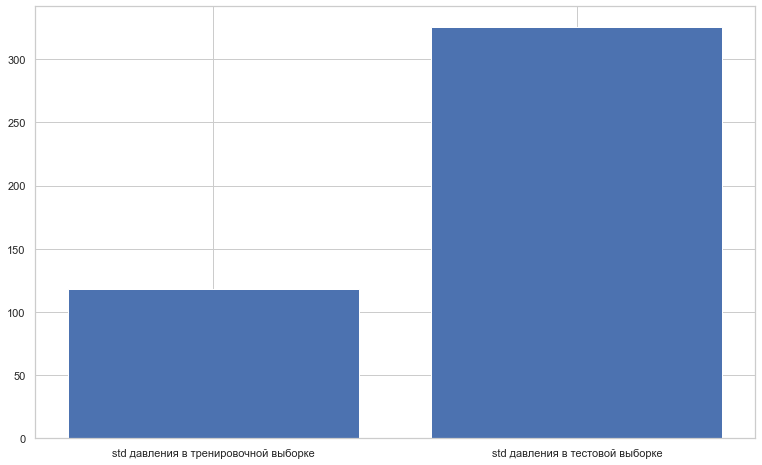

In [470]:
# Давление
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
params = ['std давления в тренировочной выборке', 'std давления в тестовой выборке']
stds = [train.pressure.std(), test.pressure.std()]
ax.bar(params, stds)

plt.show()

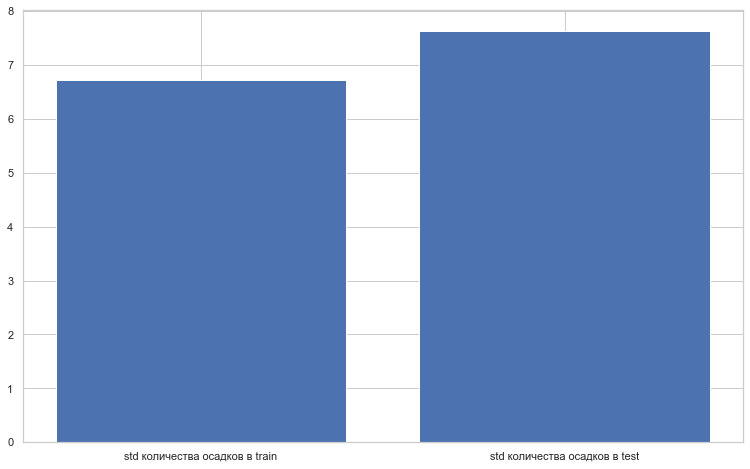

In [469]:
# Давление
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
params = ['std количества осадков в train', 'std количества осадков в test']
stds = [train.precipitation.std(), test.precipitation.std()]
ax.bar(params, stds)

plt.show()

In [463]:
# сравним среднее между выборками train/test
print('Сравнение среднего по выборкам')
for col in ['counter', 'city', 'function', 'square', 'year', 'temp', 'clouds', 'dew', 'precipitation', 'pressure', 'wdirection','wspeed']:
    print(f'Среднее по признаку {col}\t train - {round(train[col].mean(), 2)} и test - {round(test[col].mean(), 2)}')

Сравнение среднего по выборкам
Среднее по признаку counter	 train - 0.66 и test - 0.66
Среднее по признаку city	 train - 7.97 и test - 8.08
Среднее по признаку function	 train - 2.16 и test - 2.17
Среднее по признаку square	 train - 107784.79 и test - 106810.75
Среднее по признаку year	 train - 783.63 и test - 804.06
Среднее по признаку temp	 train - 16.06 и test - 14.04
Среднее по признаку clouds	 train - 1.08 и test - 1.05
Среднее по признаку dew	 train - 7.75 и test - 7.2
Среднее по признаку precipitation	 train - 0.65 и test - 0.77
Среднее по признаку pressure	 train - 898.85 и test - 534.39
Среднее по признаку wdirection	 train - 166.99 и test - 160.14
Среднее по признаку wspeed	 train - 3.51 и test - 3.04


"В среднем по ..." выделилась разница между pressure. Отразим графически

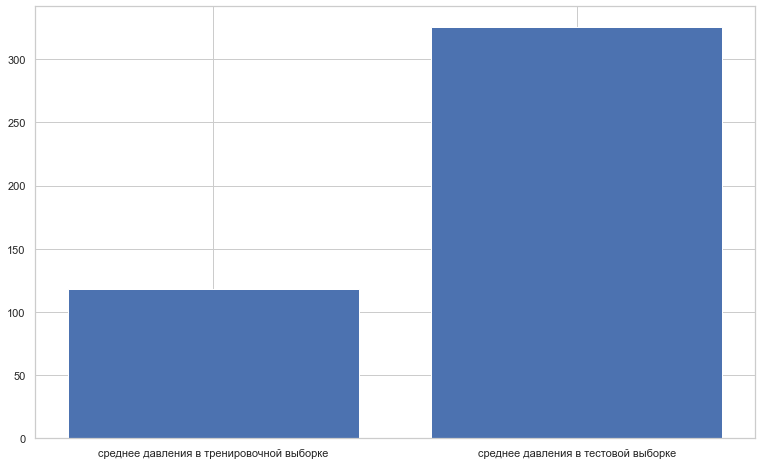

In [471]:
# Давление
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
params = ['среднее давления в тренировочной выборке', 'среднее давления в тестовой выборке']
stds = [train.pressure.std(), test.pressure.std()]
ax.bar(params, stds)

plt.show()

In [472]:
# сравним медианы между выборками train/test
print('Сравнение медиан по выборкам')
for col in ['counter', 'city', 'function', 'square', 'year', 'temp', 'clouds', 'dew', 'precipitation', 'pressure', 'wdirection','wspeed']:
    print(f'Среднее по признаку {col}\t train - {round(train[col].median(), 2)} и test - {round(test[col].median(), 2)}')

Сравнение медиан по выборкам
Среднее по признаку counter	 train - 0.0 и test - 0.0
Среднее по признаку city	 train - 9.0 и test - 9.0
Среднее по признаку function	 train - 1.0 и test - 1.0
Среднее по признаку square	 train - 72709.0 и test - 72193.0
Среднее по признаку year	 train - 0.0 и test - 0.0
Среднее по признаку temp	 train - 16.7 и test - 16.7
Среднее по признаку clouds	 train - 0.0 и test - 0.0
Среднее по признаку dew	 train - 8.9 и test - 8.9
Среднее по признаку precipitation	 train - 0.0 и test - 0.0
Среднее по признаку pressure	 train - 1016.4 и test - 1016.4
Среднее по признаку wdirection	 train - 190.0 и test - 190.0
Среднее по признаку wspeed	 train - 3.1 и test - 3.1


Поскольку медианы устойчивы к выбросам, то мы видим, что по этому параметру выборки практически идентичны

# Выбросы

Предварительно посмотрим на распределение некоторых переменных

<AxesSubplot:>

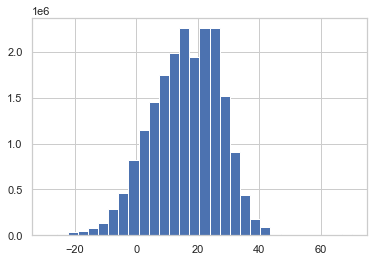

In [473]:
# распределение переменной temp
train.temp.hist(bins=30)

<AxesSubplot:>

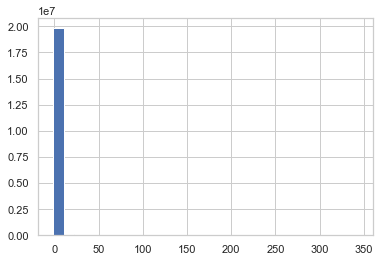

In [474]:
# распределение переменной precipitation
train.precipitation.hist(bins=30)

<AxesSubplot:>

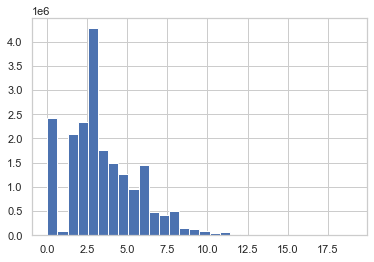

In [475]:
# распределение переменной wspeed
train.wspeed.hist(bins=30)

Во всех этих распределениях мы видим выбросы на "хвостах"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


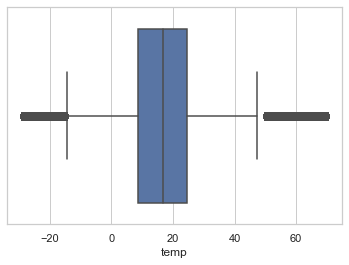

In [476]:
# ящик с усами для температуры
sns.boxplot(train.temp)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wspeed'>

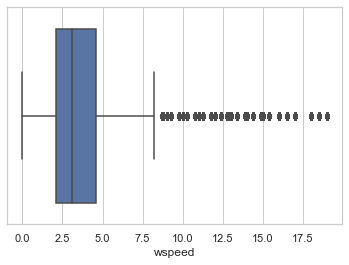

In [477]:
# ящик с усами для скорости ветра
sns.boxplot(train.wspeed)

На ящиках с усами мы так же видим выбросы за границей полуторного интерквантильного размаха.

В рамках "читерства" можем посмотреть распределения всех переменных на парном графике

<Figure size 1440x1440 with 0 Axes>

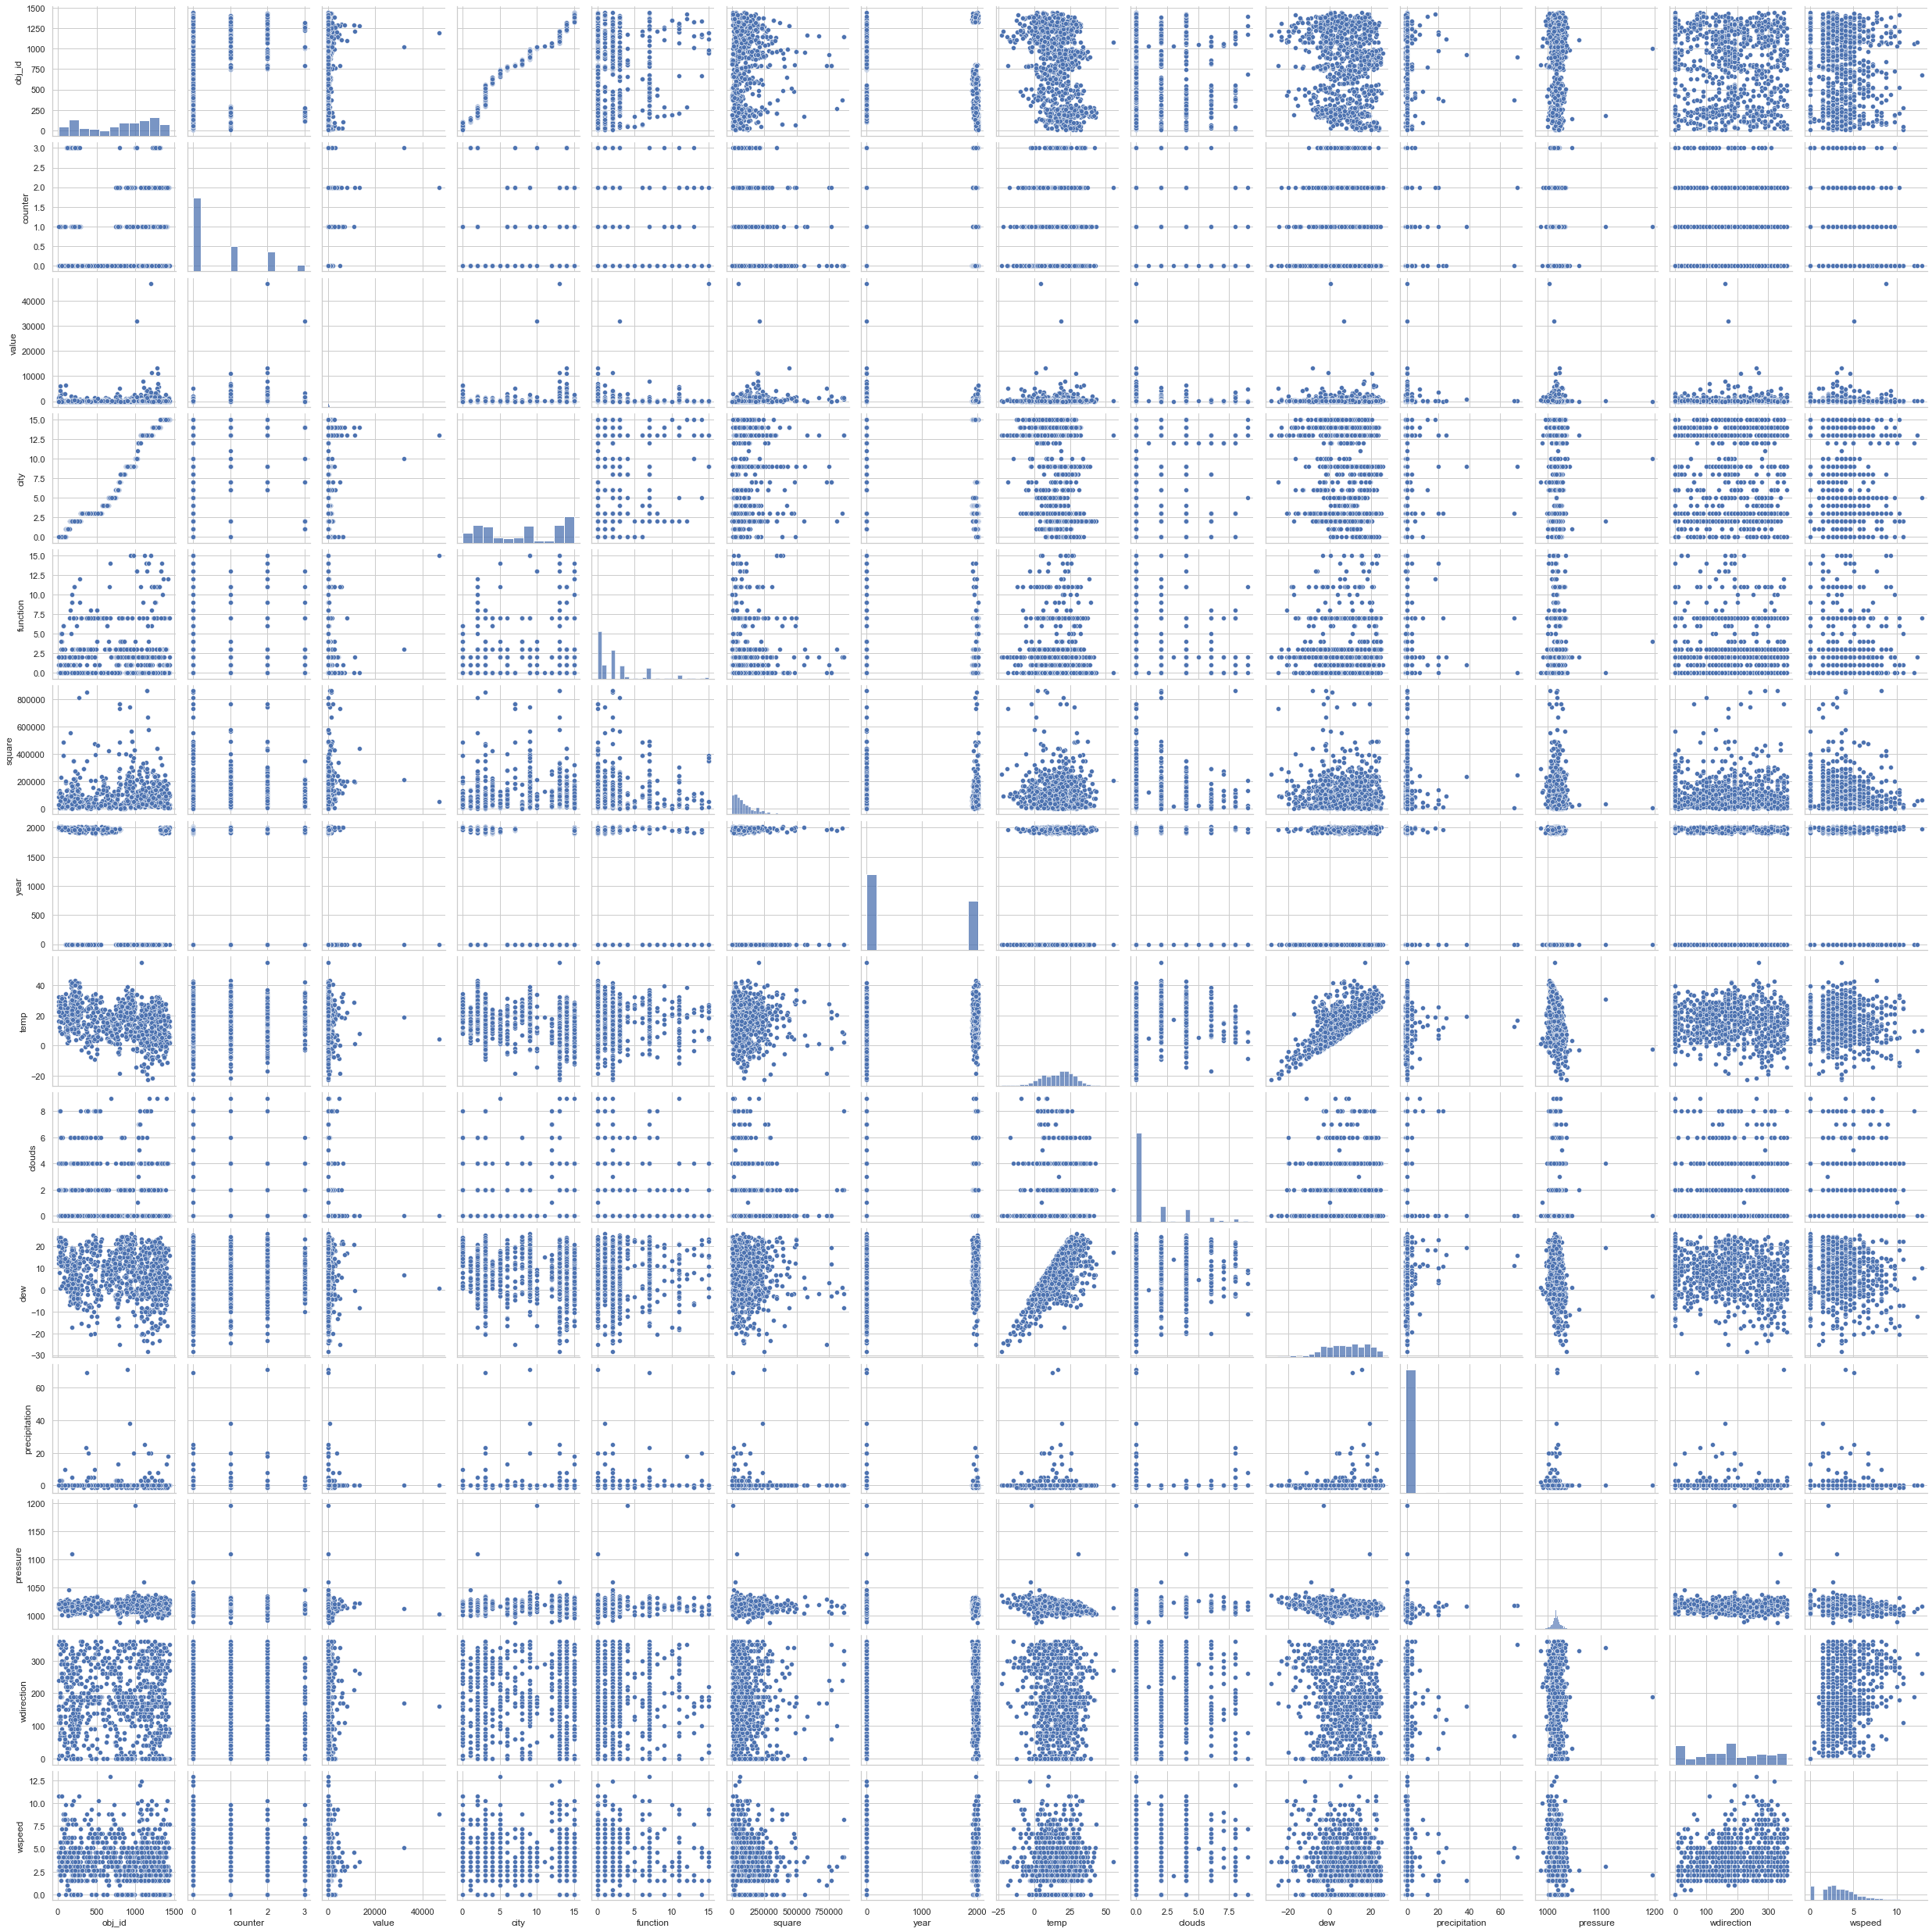

In [478]:
plt.figure(figsize=(20,20))
sns.pairplot(train.sample(1000))

Кстати здесь признаки корреляции city-obj_id, dew и temp. Но к этому вопросу вернёмся позднее

Обработаем температуру, например, от выбросов. Для определения выбросов найдём интеркватильный размах и отсечем всё, что вне диапазона +- полтора интерквартильных размаха


\$IQR = Q_3 - Q_1$

\$[Q_1 - 1.5 * IQR, Q_3 + 1.5 * IQR]$

In [479]:
q1 = train.temp.quantile(0.25)
q3 = train.temp.quantile(0.75)

In [480]:
iqr = q3 - q1

In [481]:
# посмотрим сколько у нас значений вылетело за интервал "верных" значений по температуре
train.query('(temp < @q1 - 1.5 * @iqr) | (temp > @q3 + 1.5 * @iqr)')

,obj_id,counter,datetime,value,city,function,square,year,temp,clouds,dew,precipitation,pressure,wdirection,wspeed
42240,0.0,0.0,2016-01-18 03:00:00,0.0000,0,0.0,7432.0,2008.0,58.692440,4.0,7.800000,0.0,1017.500000,290.0,3.6
42241,1.0,0.0,2016-01-18 03:00:00,0.0000,0,0.0,2720.0,2004.0,58.692440,4.0,7.800000,0.0,1017.500000,290.0,3.6
42242,2.0,0.0,2016-01-18 03:00:00,0.0000,0,0.0,5376.0,1991.0,58.692440,4.0,7.800000,0.0,1017.500000,290.0,3.6
42243,3.0,0.0,2016-01-18 03:00:00,0.0000,0,0.0,23685.0,2002.0,58.692440,4.0,7.800000,0.0,1017.500000,290.0,3.6
42244,4.0,0.0,2016-01-18 03:00:00,0.0000,0,0.0,116607.0,1975.0,58.692440,4.0,7.800000,0.0,1017.500000,290.0,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20215276,1400.0,1.0,2016-02-19 08:00:00,3.0661,15,1.0,21168.0,1928.0,-15.600000,0.0,-17.200001,0.0,1033.800049,80.0,2.6
20215277,1400.0,1.0,2016-02-19 09:00:00,2.7437,15,1.0,21168.0,1928.0,-16.100000,0.0,-17.799999,0.0,1033.800049,90.0,3.1
20215278,1400.0,1.0,2016-02-19 10:00:00,1.6201,15,1.0,21168.0,1928.0,-15.000000,0.0,-17.200001,0.0,1033.199951,80.0,2.6
20215484,1400.0,1.0,2016-02-28 00:00:00,4.2968,15,1.0,21168.0,1928.0,55.144802,2.0,-7.200000,0.0,1012.700012,200.0,4.1


Итого 175769 записей выбросы. Автоматизируем удаление выбросов в датасете, создав для этого функцию

In [482]:
train.columns

Index(['obj_id', 'counter', 'datetime', 'value', 'city', 'function', 'square',
       'year', 'temp', 'clouds', 'dew', 'precipitation', 'pressure',
       'wdirection', 'wspeed'],
      dtype='object')

In [483]:
# удаление выбросов в датасете
def remove_noise(dataset):
    # количественные столбцы
    num_vars = ['square', 'temp', 'dew', 'precipitation', 'pressure', 'wspeed', 'value']

    for col in num_vars:
        q1 = dataset[col].quantile(0.25)
        q3 = dataset[col].quantile(0.75)

        iqr = q3 - q1

        dataset = dataset[(dataset[col] >= q1 - 1.5 * iqr) & (dataset[col] <= q3 + 1.5 * iqr)]

    return dataset

Используя новую функцию удалим выбросы в train. Удалять выбросы в test не имеет никакого смысла, т.к. из всех значений мы должны получить предсказание

In [484]:
# количество записей до удаления выбросов
train.shape[0]

20125605

In [485]:
# удаляем "шум"
train = remove_noise(train)

In [486]:
# размер после удаления выбросов
train.shape[0]

14337630

In [501]:
print(f'Количество объектов-строк сократилось на {round((1 - 14337630/20125605) * 100, 2)}%')

Количество объектов-строк сократилось на 28.76%


# Исследование взаимосвязей

Посмотрим тепловую карту корреляций

<AxesSubplot:>

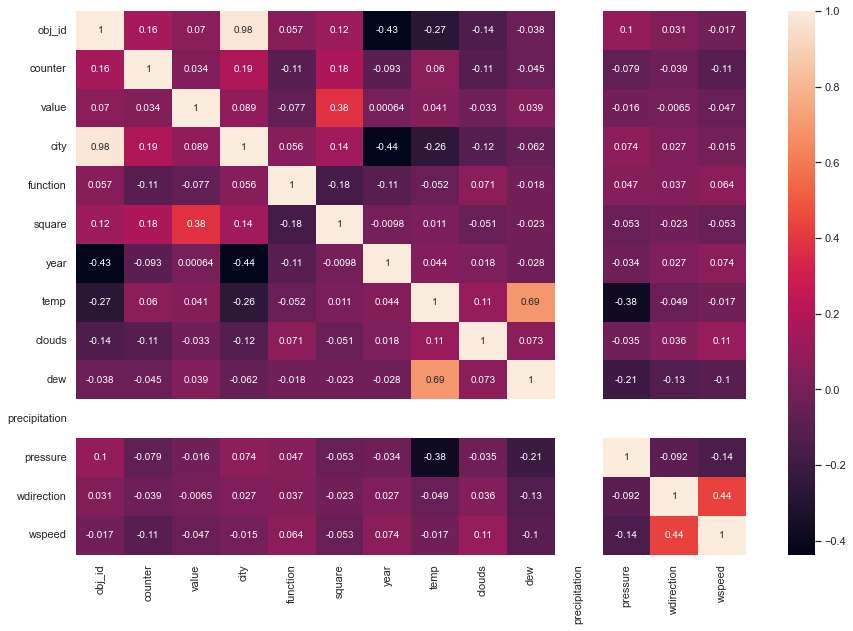

In [487]:
plt.figure(figsize=(15,10))
sns.heatmap(train.sample(10000).corr(), annot=True)

Очень сильная положительная корреляция obj_id и city. С учетом того, что для связи этих переменных и сокращения объёма в train/test, wtrain/wtest была даже введена мета-таблица для отражения связи, то это даже очевидно. Смею предположить, что obj_id вообще подбирался на основе города (как-то закодирован?). Одну из этих переменных придётся удалить, т.к. они дают одинаковую информацию модели. Но об удалении фич поговорим после feature engineering. Удаление откладываю.

Также наблюдается сильная положительная корреляция между точкой росы и температурой. Но это тоже очевидно, т.к. в зависимости от температуры (и влажности) роса выпадает или нет. С этим пока тоже ничего не делаем, т.к. я хочу позднее добавить на основе этих переменных новые

Средняя отрицательная корреляция obj_id и года выпуска, года выпуска и города. Вероятно в каких-то городах объекты новее, в каких-то старше... Опять же это только навскидку, т.к. переменная city категориальная

Средняя отрицательная корреляция температуры и obj_id. Не думаю, что совпадение - предположу, что здесь зависимость региона, где располагается объект

In [488]:
# корреляции с ответом
train.sample(10000).corr()['value'].sort_values(ascending=False)

value            1.000000
square           0.395833
city             0.065519
temp             0.053334
dew              0.044649
obj_id           0.044606
counter          0.027792
year             0.007575
pressure        -0.008590
wdirection      -0.029839
clouds          -0.032329
wspeed          -0.056611
function        -0.085557
precipitation         NaN
Name: value, dtype: float64

Каких-либо значимых корреляций с value не наблюдается

**Проанализируем важность фич**. Однако на основании этого анализа о нужности/ненужности фич говорить рано - повторный анализ после генерации новых признаков, а так же "уничтожения" категориальности

Давайте перво-наперво оценим важность фич с помощью алгоритма дерева решений

In [489]:
# возьмём какой-то случайный сэмпл уменьшенного размера, на котором проведём обучение
sampled = train.sample(100000)

In [490]:
# разобьём на X, y (объект-ответ)
X = sampled.drop(columns=['value', 'datetime'], axis=1)
y = sampled.value

In [491]:
from sklearn.tree import DecisionTreeRegressor

In [492]:
dtr = DecisionTreeRegressor()

In [493]:
dtr.fit(X, y)

DecisionTreeRegressor()

In [494]:
# выводим предварительную таблицу важности признаков
feature_importances = pd.DataFrame({
    'feature': X.columns, 
    'importance': dtr.feature_importances_
}).sort_values('importance', ascending=False)

In [495]:
feature_importances

,feature,importance
4,square,0.305451
0,obj_id,0.195718
1,counter,0.091908
8,dew,0.084216
6,temp,0.082844
10,pressure,0.053664
3,function,0.041256
5,year,0.041195
11,wdirection,0.039646
12,wspeed,0.029141


Предварительно осадки, город, облачность, год, точка росы и скорость ветра несут очень малую важность. Но говорить об этом рано

С помощью метода главных компонент определим кумулятивную выборочную дисперсию признаков для того, чтобы понять то, какие признаки объясняют бОльшую часть дисперсии в данных.

In [496]:
from sklearn.decomposition import PCA

In [497]:
pca_test = PCA()
pca_test.fit(X)

PCA()

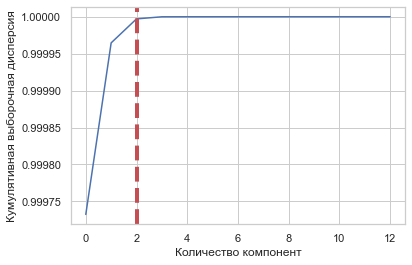

In [498]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная выборочная дисперсия')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=2, ymin=0, ymax=1)
plt.show()

Любопытно! Получается, что всего лишь 2 компоненты позволяет объяснить практически 100% дисперсии, а 3 - все 100%. Если выбрать по важности переменные обучения дерева решений, то это - тип счетчика, давление на уровне моря (атмосферное?), температура воздуха

Ещё раз - выводов окончательных по теме не делаю, т.к. процедуру необходимо повторить после полного формирования признаков. В "декатегоризацию" не лезу, т.к. боюсь опять залезть вперёд (предполагаю, что это будет дальше оцениваться)